# Document Embedding and Clustering

1. Text Preprocessing
2. Feature Engineering -- Document Embedding
    >Doc2Vec
3. Clustering
    >Hierarchical Clustering
    >K-Means Clustering
4. Dimensionality Reduction
    >t-SNE
5. Visualizing the Clusters
    >3D
    >2D

In [598]:
# importing requisite packages:

# utility
import pandas as pd
# silencing future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# nlp packages
from nltk.corpus import stopwords

# loading the Doc2Vec model and the TaggedDocument class
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [440]:
# loading the data
df = pd.read_csv('comedy_cleaned.csv', sep='\t')

In [441]:
# checking the data
df.sample(n = 10, replace = False) # looks good

,year,title,text
130,2019,emily heller: ice thickeners (2019),"Emily Heller compares Donald Trump to Air Bud,..."
188,2018,d.l. hughley: contrarian (2018),THE UNIVERSITY OF THE ARTS MERRIAM THEATER ♪Am...
167,2012,sebastian maniscalco: what’s wrong with people...,"Please welcome Sebastian Maniscalco. So good, ..."
98,2013,chris d’elia: white male. black comic. (2013),"Man: ♪ damn, damn, damn ♪ ♪ feel my flow, act..."
379,1996,george carlin: back in town (1996),Back in Town is George Carlin’s 15th album and...
117,2019,michelle wolf: joke show (2019),It seems like… It seems like over the past cou...
239,2017,brian regan: nunchucks and flamethrowers (2017),Ladies and gentlemen… please welcome Brian R...
270,2016,whitney cummings: i’m your girlfriend (2016),"(techno music playing) ♪ ♪ ♪ Play it, say it, ..."
355,2007,louis c.k.: shameless (2007),Please welcome Louis C.K.! Thank you. Thank yo...
199,2015,jim norton: contextually inadequate (2015),"Ladies and gentlemen, please welcome, Jim Nort..."


# Text Preprocessing
- converting the text to lowercase
- retaining only alpha characters and whitespace using regular expressions
- eliminating cases of multiple spaces in the text to avoid issues with tokenization
- removing stopwords

In [442]:
# converting the text to lowercase
df['text'] = df['text'].str.lower()

In [443]:
# checking the result
df.sample(n = 10, replace = False) # looks good

,year,title,text
246,2004,chris rock: never scared (2004),chris rock pulls out all the stops in his no-h...
241,2011,jimmy carr: being funny (2011),recorded live at the birmingham’s symphony hal...
272,2015,anjelah johnson: not fancy (2015),not fancy was filmed at the city national grov...
6,2022,dave chappelle stand-up monologue snl (2022),"ladies and gentlemen, dave chappelle. ♪♪ ♪♪ ♪..."
267,2013,craig ferguson: i’m here to help (2013),"– the first time i saw craig ferguson, i was i..."
356,2014,bill burr: i’m sorry you feel that way (2014),"all right, thank you! thank you very much! th..."
346,1999,mitch hedberg: comedy central special (1999),mitch hedberg’s half-hour special on comedy ce...
139,2019,jo koy: comin’ in hot (2019),"hawaii. are you ready? ladies and gentlemen,..."
307,2012,john mulaney: new in town (2012),"♬ new in town, ♬ john mulaney’s new in town..."
136,2019,mike epps: only one mike (2019),♪ washington d.c. are you ready? ♪ ♪ it’s abou...


In [444]:
# retaining only alpha characters and whitespace using regular expressions
df['text'] = df['text'].str.replace('[^a-z\s]', '')

In [445]:
# checking the result
df.sample(n = 10, replace = False) # looks good

,year,title,text
247,2005,stewart lee: stand-up comedian (2005),recorded on march at the stand glasgow so on...
131,2019,david cross: oh come on (2019),this is the full transcript of david cross lat...
0,2023,bert kreischer: razzle dazzle (2023),ladies and gentlemen please welcome to the st...
220,2018,greg davies: you magnificent beast (2018),now im not trying to be rude but hey pretty ...
337,1993,bill hicks: revelations (1993),recorded at the london dominion theatre in nov...
70,2020,jack whitehall: i’m only joking (2020),look jack jack jack can you sign this for me p...
108,2019,sara pascoe: ladsladslads (2019),cheering and applause thank you so much thank ...
241,2011,jimmy carr: being funny (2011),recorded live at the birminghams symphony hall...
320,2016,hannibal buress: comedy camisado (2016),please welcome to the stage hannibal buress...
208,2016,russell peters: almost famous (2016),yeah russell oi russell your mother is so fat ...


In [446]:
# getting summary stats on the length of each document
df['text'].str.len().describe()

count      386.000000
mean     41720.386010
std      15074.883705
min       2434.000000
25%      36052.250000
50%      43132.500000
75%      50403.250000
max      85178.000000
Name: text, dtype: float64

In [447]:
# still have some non-breaking spaces in the text, ex:
df.loc[258, 'text'][:125]

'  swingin while im singin givin what ya gettin\xa0  knowin what i know\xa0 ladies and\xa0gentlemen welcome to\xa0the\xa0stage maz jobrani  w'

In [448]:
# # removing non-breaking spaces
df['text'] = df['text'].str.replace('\xa0', ' ')

In [449]:
# checking the entry at index 258
df.loc[258, 'text'][:100]

'  swingin while im singin givin what ya gettin   knowin what i know  ladies and gentlemen welcome to'

In [450]:
# checking the summary stats on the length of each document again
df['text'].str.len().describe()

count      386.000000
mean     41720.386010
std      15074.883705
min       2434.000000
25%      36052.250000
50%      43132.500000
75%      50403.250000
max      85178.000000
Name: text, dtype: float64

In [451]:
# eliminating cases of multiple spaces in the text--likely a product of prior cleaning
df['text'] = df['text'].str.replace('\s+', ' ')

In [452]:
# checking the result
df.sample(n = 10, replace = False) # looks good

,year,title,text
327,2017,jim norton: mouthful of shame (2017),first of all thank you so much for doing this ...
248,2016,jimmy carr: funny business (2016),wow good evening london you well yes fabulous...
165,2018,latin history for morons: john leguizamo’s roa...,there are people out there trying to rewrite o...
75,2020,eric andre: legalize everything (2020),i stole this from the evidence room man legal...
282,2017,patton oswalt: annihilation (2017),comedian patton oswalt returns to netflix with...
79,2017,chris gethard: career suicide (2017),i hate my brain because the things i think so...
358,2004,dave chappelle: for what it’s worth (2004),whyd you pick san francisco to shoot your spec...
172,2004,volker pispers about usa (2004),you all got used to the new timescale we used ...
257,2000,ellen degeneres: the beginning (2000),ladies and gentlemen please welcome ellen dege...
332,2013,bo burnham: what (2013),bo what old macdonald had a farm e i e i o and...


In [453]:
# removing stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [454]:
# checking the result
df.sample(n = 10, replace = False) # looks good

,year,title,text
78,2017,mark normand: don’t be yourself (2017),mark normand one minute amy schumer mark liste...
85,2020,patton oswalt: i love everything (2020),full transcript patton oswalt love everything ...
66,2009,craig ferguson: a wee bit o’ revolution (2009),arrived brokendown vaudevillian old country ar...
325,1965,lenny bruce: the berkeley concert (1965),recorded december released produced john judni...
131,2019,david cross: oh come on (2019),full transcript david cross latest standup sho...
332,2013,bo burnham: what (2013),bo old macdonald farm e e farm pig e e snort o...
138,2017,jo koy: live from seattle (2017),yo finally know im finally finally know im fin...
357,2012,bill burr: you people are all the same (2012),ladies gentlemen bill burr right thank thank t...
218,2018,john mulaney: kid gorgeous at radio city (2018),welcome radio city music hall time questions w...
251,2016,kevin hart: what now (2016),films spy subplot set events performance kevin...


In [455]:
# getting summary stats on the length of each document again
df['text'].str.len().describe()

count      386.000000
mean     26175.240933
std       9478.113512
min       1581.000000
25%      22501.250000
50%      26913.000000
75%      31830.250000
max      51277.000000
Name: text, dtype: float64

In [456]:
# tokenizing the text column into a list of words, splitting on whitespace
df['tokens'] = df['text'].str.split()

In [457]:
# checking the result
df.sample(n = 10, replace = False) # looks good

,year,title,text,tokens
76,2017,roy wood jr.: father figure (2017),look im probably gonna live long enough teach ...,"[look, im, probably, gonna, live, long, enough..."
51,2021,brian regan: on the rocks (2021),filmed tuacahn outdoor amphitheater utah ladie...,"[filmed, tuacahn, outdoor, amphitheater, utah,..."
279,2015,aziz ansari: live in madison square garden (20...,thank much thank much new york holy shit madis...,"[thank, much, thank, much, new, york, holy, sh..."
298,2017,erik griffin: the ugly truth (2017),ladies gentlemen live laugh factory long beach...,"[ladies, gentlemen, live, laugh, factory, long..."
203,2010,ricky gervais: live iv science (2010),thunderclap spooky voice long ago castle labor...,"[thunderclap, spooky, voice, long, ago, castle..."
364,1991,bill hicks: relentless (1991),recorded centaur theatre annual laughs comedy ...,"[recorded, centaur, theatre, annual, laughs, c..."
109,2019,dan soder: son of a gary (2019),announcer ladies gentlemen dan soder cheers ap...,"[announcer, ladies, gentlemen, dan, soder, che..."
207,2006,russell peters: outsourced (2006),ladies gentlemen ladies gentlemen please say g...,"[ladies, gentlemen, ladies, gentlemen, please,..."
310,2017,"norm macdonald: hitler’s dog, gossip & tricker...",people go goddamn least hes hypocrite youve go...,"[people, go, goddamn, least, hes, hypocrite, y..."
159,2016,ricky gervais: 2016 golden globes opening mono...,shoosh shut disgusting pillpopping sexualdevia...,"[shoosh, shut, disgusting, pillpopping, sexual..."


# Document Embedding using Doc2Vec from the Gensim package
- using the TaggedDocument class to tag each document with its index
- training the model
- infering the vector for each document
- creating a dataframe with the document vectors

In [458]:
df.head()

,year,title,text,tokens
0,2023,bert kreischer: razzle dazzle (2023),ladies gentlemen please welcome stage bert kre...,"[ladies, gentlemen, please, welcome, stage, be..."
1,2023,chris rock: selective outrage (2023),lets go said ill anything want said bitch pain...,"[lets, go, said, ill, anything, want, said, bi..."
2,2013,marc maron: thinky pain (2013),dont know thinking like im nervous really im t...,"[dont, know, thinking, like, im, nervous, real..."
3,2020,chelsea handler: evolution (2020),join welcoming author six number one new york ...,"[join, welcoming, author, six, number, one, ne..."
4,2022,tom papa: what a day! (2022),premiered december ladies gentlemen give tom p...,"[premiered, december, ladies, gentlemen, give,..."


In [459]:
# creating tagged documents of the `tokens` column: each document is a list of tokens
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['tokens'])]
documents[0]

TaggedDocument(words=['ladies', 'gentlemen', 'please', 'welcome', 'stage', 'bert', 'kreischer', 'yes', 'thank', 'thank', 'thank', 'yes', 'look', 'beautiful', 'sir', 'thank', 'thank', 'look', 'beautiful', 'thank', 'sir', 'skinniest', 'fat', 'ive', 'ever', 'yeah', 'yeah', 'know', 'know', 'im', 'fat', 'jog', 'ass', 'hairs', 'tie', 'knot', 'yeah', 'dont', 'even', 'know', 'happening', 'really', 'treat', 'get', 'shower', 'get', 'handful', 'soap', 'give', 'little', 'credit', 'card', 'action', 'get', 'denied', 'im', 'talking', 'rope', 'ladies', 'ass', 'cheek', 'ass', 'cheek', 'usually', 'comes', 'free', 'hairy', 'men', 'italian', 'women', 'tell', 'put', 'finger', 'top', 'youre', 'free', 'like', 'sleep', 'braid', 'thing', 'one', 'time', 'vacation', 'wouldnt', 'come', 'free', 'like', 'im', 'shower', 'tugging', 'im', 'panicking', 'got', 'take', 'shit', 'dont', 'something', 'im', 'gonna', 'playdoh', 'factory', 'get', 'shower', 'grab', 'pocket', 'knife', 'walk', 'wife', 'go', 'need', 'know', 'youre

In [460]:
# training the model
PV_DM_model = Doc2Vec(documents,
                vector_size=10, # dimensionality of the vector space
                dm=1, # using the distributed memory model
                window=5, # the maximum distance between the current and predicted word within a sentence
                min_count=2, # minimum number of times a word must appear in the corpus to be included in the vocabulary
                epochs=100, # number of epochs to train the model
                workers=10 # using all available cores
)

In [461]:
# inferring the vector for each document
doc_vectors = [PV_DM_model.infer_vector(doc) for doc in df['tokens']]

In [462]:
# adding the document vectors to the dataframe
df['doc_vector'] = doc_vectors

In [463]:
# creating a new dataframe with just year, title, and the document vectors
df_doc_vectors = df[['year', 'title', 'doc_vector']]
# expanding the document vectors from a list to separate columns
df_doc_vectors = pd.concat([df_doc_vectors.drop(['doc_vector'], axis=1), df_doc_vectors['doc_vector'].apply(pd.Series)], axis=1)
# converting the column names to strings
df_doc_vectors.columns = df_doc_vectors.columns.astype(str)
df_doc_vectors.sample(n = 10, replace = False) # looks good

,year,title,0,1,2,3,4,5,6,7,8,9
284,2014,bill maher: live from d.c. (2014),0.540742,-0.090439,1.074853,5.065866,-0.710271,-3.875841,-4.684719,1.495466,1.787305,3.593254
297,1999,comedy central presents: dave attell (1999),4.396559,-0.156771,-2.843897,4.040194,0.551469,-0.202522,-1.085436,-1.132257,-0.874657,-4.614302
306,1991,norm macdonald: one night stand (1991),-2.997600,-4.683824,0.640285,-2.870409,7.109578,2.069690,-4.053643,-2.539699,-3.929306,3.953892
127,2006,george carlin: dumb americans (2006),-1.709229,4.735241,1.093673,3.182263,2.831685,-9.138239,-10.232698,-1.222367,1.599299,-1.600566
228,2013,mike birbiglia: my girlfriend’s boyfriend (201...,-6.161291,1.001390,-6.455523,1.147166,-2.239057,8.001330,1.440695,-3.382522,-5.011590,-0.920848
208,2016,russell peters: almost famous (2016),-3.174920,-0.355726,-2.448388,0.242131,3.614757,2.208447,0.359916,-1.511672,-5.456324,1.769643
79,2017,chris gethard: career suicide (2017),-3.878610,1.444561,-6.910257,1.882522,-1.226053,4.296632,2.005563,-2.427436,-4.195560,-1.891991
282,2017,patton oswalt: annihilation (2017),-0.365836,1.262153,-3.930312,1.500532,1.173901,1.678744,0.156286,0.219861,-2.096611,-0.762899
231,1996,chris rock: bring the pain (1996),1.380918,-3.970046,-1.515364,-0.007633,7.516550,-17.137905,-8.443550,3.016887,-0.338060,3.513992
333,2016,bo burnham: make happy (2016),-0.114398,1.431818,0.108266,4.131131,0.016923,-0.692565,-1.799356,-3.416337,-0.649852,-1.688715


In [464]:
# setting the index to be the concatenation of the title and year column, separated by |, and replacing instances of "  " with ""
df_doc_vectors.set_index(df_doc_vectors['title'] + '| ' + df_doc_vectors['year'].astype(str), inplace=True)

In [465]:
# dropping the title and year columns
df_doc_vectors.drop(['title', 'year'], axis=1, inplace=True)

In [466]:
# checking the result
df_doc_vectors.sample(n = 10, replace = False) # looks good

,0,1,2,3,4,5,6,7,8,9
patton oswalt: annihilation (2017) | 2017,-0.365836,1.262153,-3.930312,1.500532,1.173901,1.678744,0.156286,0.219861,-2.096611,-0.762899
daniel tosh: people pleaser (2016) | 2016,-1.393152,1.123492,-3.334599,1.062245,0.875493,-1.579264,-1.123617,-1.450816,-1.466406,-1.872360
kavin jay: everybody calm down! (2018) | 2018,-7.018796,-0.083266,-2.378156,1.596135,0.951955,7.679997,0.011897,-4.096157,-3.974990,4.362033
dave chappelle: snl monologue (2020) | 2020,0.763330,0.806838,-4.080123,2.653379,-0.057769,-8.394823,-3.872491,3.811273,-1.808377,1.874077
jimmy carr: being funny (2011) | 2011,-4.096992,-2.901212,0.054197,6.145376,-7.810456,12.754212,-3.112464,-5.744984,2.939614,-1.480777
kevin bridges: the story so far… live in glasgow (2010) | 2010,-2.192909,1.651291,-1.447865,5.640841,-9.795819,10.900640,-3.673354,-4.267034,2.313265,0.474653
jimmy carr: funny business (2016) | 2016,-4.420150,-3.476434,-1.600968,5.579481,-6.065416,14.554376,-0.535668,-5.054428,0.384318,-3.636528
louis c.k.: chewed up (2008) | 2008,-1.901366,-5.127721,-2.536391,-1.159555,8.004880,-1.611711,-1.939503,-0.540632,-5.088516,-4.399161
john mulaney: the comeback kid (2015) | 2015,-2.332360,-0.645342,-0.782355,1.276039,1.917005,2.595042,-1.935523,-0.343941,-0.826146,3.180391
chris gethard: career suicide (2017) | 2017,-3.878610,1.444561,-6.910257,1.882522,-1.226053,4.296632,2.005563,-2.427436,-4.195560,-1.891991


# Clustering
### Using:
1. hierarchical clustering
2. k-means clustering

In [469]:
# importing the requisite packages
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [470]:
# transposing the dataframe to make it easier to work with
df_doc_vectors_transpose = df_doc_vectors.T

Text(0.5, 1.0, 'Heatmap of Document Embeddings')

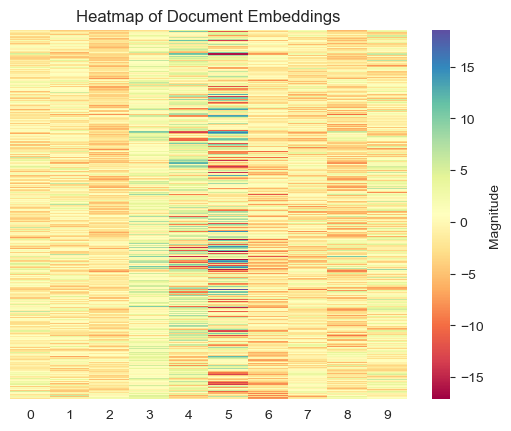

In [471]:
# using seaborn to make a heatmap of the document vectors
sns.heatmap(df_doc_vectors,
            cmap='Spectral',
            yticklabels=False,
            cbar_kws={'label': 'Magnitude'})
plt.title("Heatmap of Document Embeddings")

Text(0.0, 1.0, 'Heatmap: Document Embeddings with Accompanying Hierarchical Clustering')

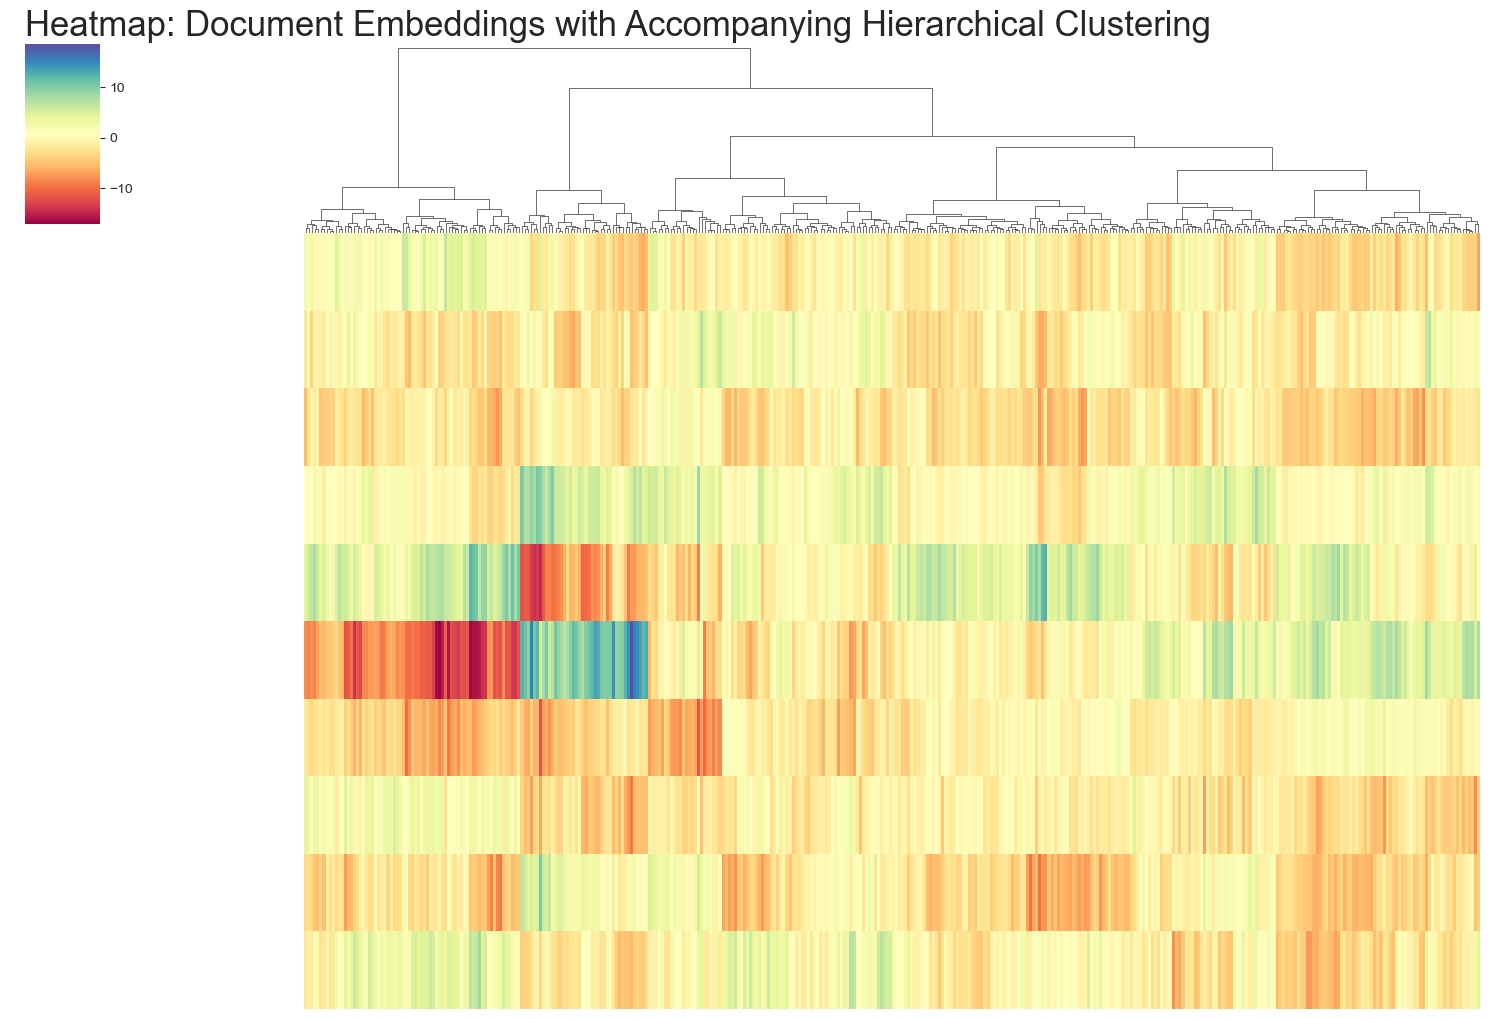

In [608]:
# using seaborn to make a clustermap of the document vectors using hierarchical clustering
sns.clustermap(df_doc_vectors_transpose,
               method='ward',
               metric='euclidean',
               row_cluster=False,
               yticklabels=False,
               xticklabels=False,
               cmap='Spectral',
               figsize=(15, 10))
plt.title("Heatmap: Document Embeddings with Accompanying Hierarchical Clustering",
          fontsize=25,
          loc="left")

In [473]:
# instantiating the hierarchical clustering model with sklearn's agglomerative clustering
hc = AgglomerativeClustering(affinity = 'euclidean',
                             linkage = 'ward',
                             n_clusters = 5)

In [474]:
# fitting the model to the document vectors
hc.fit(df_doc_vectors)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [475]:
# converting the labels to a list
hc_labels = hc.labels_.tolist()

In [476]:
# creating a new dataframe with the cluster labels and index from the document vectors dataframe
df_cluster_labels = pd.DataFrame({'hc_labels': hc_labels},
                            index = df_doc_vectors.index)

In [477]:
# investigating the cluster sizes
df_cluster_labels['hc_labels'].value_counts()

0    115
1     80
4     78
3     71
2     42
Name: hc_labels, dtype: int64

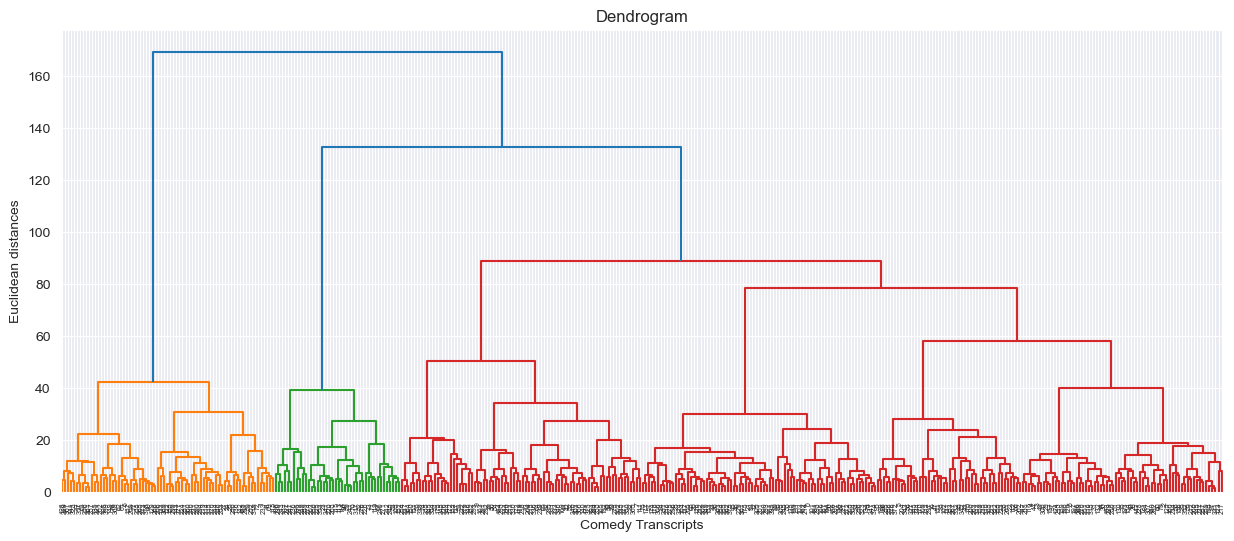

In [610]:
# visualizing just the dendrogram of the hierarchical clustering model--colors do not pertain to anything
plt.figure(figsize=(15, 6))
plt.title('Dendrogram')
plt.xlabel('Comedy Transcripts')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(df_doc_vectors,
                                        method = 'ward',
                                        metric = 'euclidean'))

In [479]:
# instantiating the k-means clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, # k = 5
                init = 'k-means++',
                max_iter = 1000, # 1000 maximum iterations if the algorithm doesn't converge
                n_init = 100, # 100 different initial centroids to pick the most consistent result
                random_state = 42)

In [480]:
# fitting the model to the document vectors
kmeans.fit(df_doc_vectors)

KMeans(max_iter=1000, n_clusters=5, n_init=100, random_state=42)

In [481]:
# getting the cluster labels
kmeans_labels = list(kmeans.labels_)

In [482]:
# adding the k-means labels to the cluster labels dataframe
df_cluster_labels['kmeans_labels'] = kmeans_labels

In [483]:
# investigating the cluster sizes
df_cluster_labels['kmeans_labels'].value_counts()

3    110
0     86
4     82
2     65
1     43
Name: kmeans_labels, dtype: int64

In [484]:
# checking the hierarchical and k-means cluster labels
df_cluster_labels

,hc_labels,kmeans_labels
bert kreischer: razzle dazzle (2023) | 2023,4,3
chris rock: selective outrage (2023) | 2023,3,2
marc maron: thinky pain (2013) | 2013,0,0
chelsea handler: evolution (2020) | 2020,0,0
tom papa: what a day! (2022) | 2022,0,0
...,...,...
louis c.k.: 2017 | 2017,4,3
george carlin: jamming in new york (1992) | 1992,1,4
reggie watts: spatial (2016) | 2016,0,1
george carlin: complaints and grievances (2001) | 2001,1,4


In [604]:
# taking a random sample of 10 transcripts from each hierarchical cluster
hierarchical_cluster_samples = df_cluster_labels.groupby('hc_labels').apply(lambda x: x.sample(n = 10, replace = False))
hierarchical_cluster_samples

hc_labels  \
hc_labels                                                                 
0         tom papa: what a day! (2022)  | 2022                        0   
          nick offerman: american ham (2014)  | 2014                  0   
          enissa amani: ehrenwort (2018) | 2018                       0   
          iliza shlesinger: unveiled (2019)  | 2019                   0   
          norm macdonald: hitler’s dog, gossip & trickery...          0   
          sam morril: i got this (2020)  | 2020                       0   
          jim norton: mouthful of shame (2017) | 2017                 0   
          todd glass: act happy (2018)  | 2018                        0   
          comedy central presents: patton oswalt (1999)  ...          0   
          dylan moran: like, totally… (2006)  | 2006                  0   
1         daniel tosh: happy thoughts (2011)  | 2011                  1   
          george carlin: you are all diseased (1999)  | 1999          1   
          mo amer: mohammed in texas (2021)  | 2021                   1   
          pete davidson presents: the best friends (2022)...          1   
          lewis black: black to the future (2016)  | 2016             1   
          robin williams live on broadway (2002)  | 2002              1   
          trevor noah: son of patricia (2018)  | 2018                 1   
          jerry seinfeld: 23 hours to kill (2020)  | 2020             1   
          w. kamau bell: private school negro (2018)  | 2018          1   
          john mulaney: snl monologue (2020)  | 2020                  1   
2         eddie izzard: stripped (2009)  | 2009                       2   
          jim jefferies: alcoholocaust (2010)  | 2010                 2   
          jimmy carr: funny business (2016)  | 2016                   2   
          sarah millican: chatterbox live (2011)  | 2011              2   
          billy connolly: high horse tour live (2016)  | ...          2   
          lee mack: going out live (2010)  | 2010                     2   
          jack whitehall: at large (2017)  | 2017                     2   
          jim jefferies: contraband (2008)  | 2008                    2   
          ricky gervais live 2: politics (2004)  | 2004               2   
          rowan atkinson live (1992)  | 1992                          2   
3         bill burr: live at red rocks (2022)  | 2022                 3   
          deon cole: charleen’s boy (2022)  | 2022                    3   
          bill burr: the philadelphia incident (2006)  | ...          3   
          chris rock: bring the pain (1996)  | 1996                   3   
          dave chappelle: sticks & stones (2019)  | 2019              3   
          kevin hart: let me explain (2013)  | 2013                   3   
          sam jay: 3 in the morning (2020)  | 2020                    3   
          bill burr: you people are all the same (2012)  ...          3   
          amanda seales: i be knowin’ (2019)  | 2019                  3   
          katt williams: great america (2018)  | 2018                 3   
4         ali wong: don wong (2022)  | 2022                           4   
          nate bargatze: full time magic (2015)  | 2015               4   
          brent morin: i’m brent morin (2015)  | 2015                 4   
          nate bargatze: the greatest average american (2...          4   
          neal brennan: 3 mics (2017)- | 2017                         4   
          anjelah johnson: not fancy (2015)  | 2015                   4   
          jerrod carmichael: rothaniel (2022)  | 2022                 4   
          chris d’elia: white male. black comic. (2013)  ...          4   
          ari shaffir: double negative (2017)  | 2017                 4   
          tom segura: ball hog (2020)  | 2020                         4   

                                                              kmeans_labels  
hc_labels                                                                    
0    

In [609]:
# taking a random sample of 10 transcripts from each kmeans cluster
kmeans_cluster_samples = df_cluster_labels.groupby('kmeans_labels').apply(lambda x: x.sample(n = 10, replace = False))
kmeans_cluster_samples

hc_labels  \
kmeans_labels                                                                 
0             marc maron: more later (2015)  | 2015                       0   
              catherine cohen: the twist…? she’s gorgeous (20...          0   
              aziz ansari: buried alive (2013)  | 2013                    0   
              chelsea handler: evolution (2020)  | 2020                   0   
              iliza shlesinger: hot forever (2022)  | 2022                0   
              kate berlant: cinnamon in the wind (2022)  | 2022           0   
              whitney cummings: can i touch it? (2019)  | 2019            0   
              iliza shlesinger: freezing hot (2015)  | 2015               0   
              mike birbiglia: my girlfriend’s boyfriend (2013...          0   
              jim jefferies: freedumb (2016)  | 2016                      0   
1             jimmy carr: the best of ultimate gold greatest ...          2   
              russell howard live: dingledodies (2009)  | 2009            2   
              ricky gervais: live iv  science (2010)  | 2010              2   
              ricky gervais: humanity (2018)  | 2018                      2   
              jimmy carr: being funny (2011)  | 2011                      2   
              jim jefferies: alcoholocaust (2010)  | 2010                 2   
              ricky gervais live 2: politics (2004)  | 2004               2   
              jack whitehall: i’m only joking (2020)  | 2020              2   
              stewart lee: 90s comedian (2006)  | 2006                    2   
              ricky gervais: out of england 2 (2010)  | 2010              2   
2             marlon wayans: woke-ish (2018)  | 2018                      3   
              david chappelle: snl monologue november 12, 201...          3   
              dave chappelle: killin’ them softly (2000)  | 2000          3   
              katt williams: great america (2018)  | 2018                 3   
              mike epps: don’t take it personal (2015)  | 2015            3   
              richard pryor: …here and now (1983)  | 1983                 3   
              richard pryor: live in concert (1979)  | 1979               3   
              richard pryor: live and smokin’ (1971)  | 1971              3   
              joe rogan: triggered (2016)  | 2016                         3   
              kevin hart: irresponsible (2019)  | 2019                    3   
3             donald glover: weirdo (2012)  | 2012                        4   
              brad williams: daddy issues (2016)  | 2016                  4   
              rob schneider: asian momma, mexican kids (2020)...          4   
              tom segura: ball hog (2020)  | 2020                         4   
              norm macdonald: one night stand (1991)  | 1991              4   
              eric andre: legalize everything (2020)| 2020                4   
              gabriel iglesias: stadium fluffy (2022)  | 2022             1   
              sebastian maniscalco: stay hungry (2019)  | 2019            4   
              al madrigal: why is the rabbit crying? (2013)  ...          4   
              colin quinn: the new york story (2016)  | 2016              1   
4             the standups: gina yashere (2018)  | 2018                   1   
              george carlin: carlin on campus (1984)  | 1984              1   
              trevor noah: afraid of the dark (2017)  | 2017              1   
              george carlin: back in town (1996)  | 1996                  1   
              george carlin: jamming in new york (1992)  | 1992           1   
              ellen degeneres: relatable (2018)  | 2018                   1   
              volker pispers about usa (2004)  | 2004                     1   
              seth meyers at the 2011 white house corresponde...          1   
              oh, hello on broadway (2017)  | 2017                        0   
              kathleen madigan: bothe

# Dimensionality Reduction
### Using:
1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
    >3 dimensions
    >2 dimensions

In [492]:
# performing dimensionality reduction on the document vectors using the t-SNE algorithm--in both 2 and 3 dimensions
from sklearn.manifold import TSNE
tsne3 = TSNE(n_components = 3, # dimensionality of the embedded space
            perplexity = 30, # n nearest neighbors each point has--clustering suggested a minimum cluster size of 42--using that benchmark to determine model attention
            learning_rate = 100,
            n_iter = 1000, # maximum number of iterations for the optimization
            verbose = 2, # provides updates on the progress of the algorithm
            random_state = 42)

tsne2 = TSNE(n_components = 2, # dimensionality of the embedded space
            perplexity = 30, # n nearest neighbors used
            learning_rate = 100,
            n_iter = 1500, # maximum number of iterations for the optimization, did not converge before 1000
            verbose = 2,
            random_state = 42)

In [493]:
# fitting the t-SNE models to the document vectors
tsne3_vectors = tsne3.fit_transform(df_doc_vectors)
tsne2_vectors = tsne2.fit_transform(df_doc_vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 386 samples in 0.001s...
[t-SNE] Computed neighbors for 386 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 3.597879
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 58.4115868, gradient norm = 0.1019293 (50 iterations in 0.277s)
[t-SNE] Iteration 100: error = 57.6271896, gradient norm = 0.0835863 (50 iterations in 0.054s)
[t-SNE] Iteration 150: error = 57.9599686, gradient norm = 0.0786181 (50 iterations in 0.054s)
[t-SNE] Iteration 200: error = 58.7254868, gradient norm = 0.0846711 (50 iterations in 0.058s)
[t-SNE] Iteration 250: error = 58.8142471, gradient norm = 0.0878956 (50 iterations in 0.077s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.814247
[t-SNE] Iteration 300: error = 0.6250370, gradient norm = 0.0018013 (50 iterations in 0.075s)
[t-SNE] Iteration 350: error = 0.5967031, gradient norm = 0.0026813 (

In [494]:
# creating dataframes with the t-SNE vectors
df_tsne3_vectors = pd.DataFrame(tsne3_vectors,
                                columns = ['x', 'y', 'z'],
                                index = df_doc_vectors.index)
df_tsne2_vectors = pd.DataFrame(tsne2_vectors,
                                columns = ['x', 'y'],
                                index = df_doc_vectors.index)

In [495]:
# adding the cluster labels to the t-SNE dataframes
df_tsne3_vectors['hc_labels'], df_tsne3_vectors['kmeans_labels']  = df_cluster_labels['hc_labels'], df_cluster_labels['kmeans_labels']
df_tsne2_vectors['hc_labels'], df_tsne2_vectors['kmeans_labels']  = df_cluster_labels['hc_labels'], df_cluster_labels['kmeans_labels']

# Visualizing the Hierarchical and K-Means Clusters
## In 2D and 3D

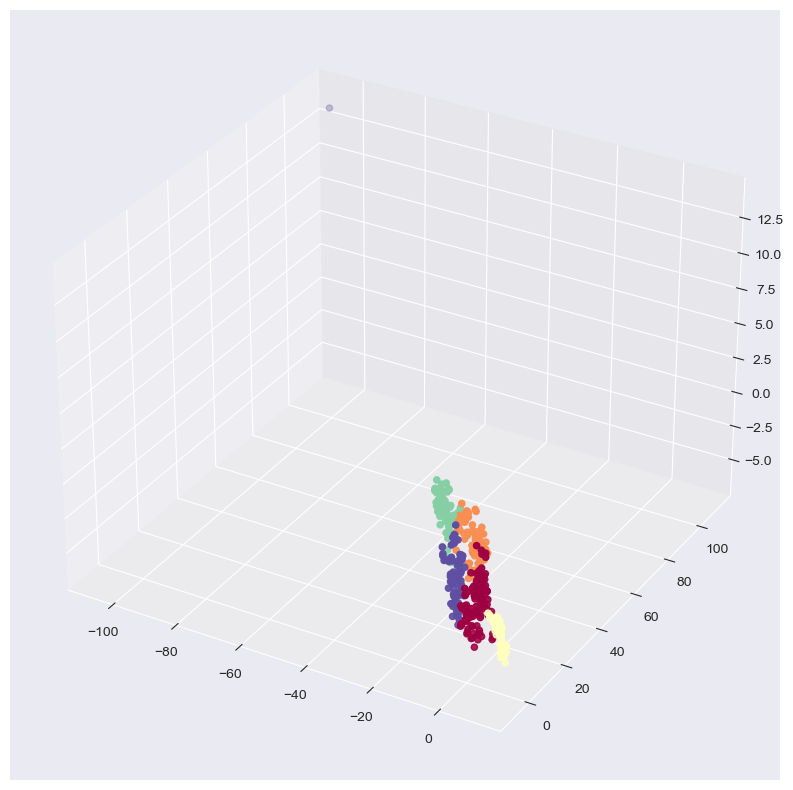

In [502]:
# plotting the original clusters in 3 dimensions using the t-SNE vectors
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_tsne3_vectors['x'],
           df_tsne3_vectors['y'],
           df_tsne3_vectors['z'],
           c = df_tsne3_vectors['hc_labels'],
           cmap = 'Spectral'
           )
# one massive outlier skewing the plot

In [518]:
# finding the massive outlier, seems to be inexplicably large in all three dimensions
df_tsne3_vectors.sort_values("x")
# tom segura's 'disgraceful' special from 2018--how disgraceful

,x,y,z,hc_labels,kmeans_labels
tom segura: disgraceful (2018) | 2018,-105.959442,110.464714,13.842431,4,3
mike epps: under rated… never faded & x-rated (2009) | 2009,-10.125153,0.680958,5.019166,3,2
mike epps: indiana mike (2022) | 2022,-9.960445,0.527443,5.211269,3,2
mike epps: don’t take it personal (2015) | 2015,-9.948484,0.614702,5.162542,3,2
chris tucker: live (2015) | 2015,-9.588719,0.682884,5.795610,3,2
...,...,...,...,...,...
stewart lee: 90s comedian (2006) | 2006,9.088214,3.900574,-4.899663,2,1
stewart lee: stand-up comedian (2005) | 2005,9.326423,3.973380,-4.903228,2,1
stewart lee: carpet remnant world (2012) | 2012,9.441969,3.910636,-5.296631,2,1
sarah millican: chatterbox live (2011) | 2011,9.453771,1.433383,-3.249902,2,1


In [519]:
# removing tom segura: disgraceful
df_tsne3_vectors = df_tsne3_vectors[df_tsne3_vectors['x'] > -100]

Text(0.5, 0.92, 'color = hierarchical clustering labels')

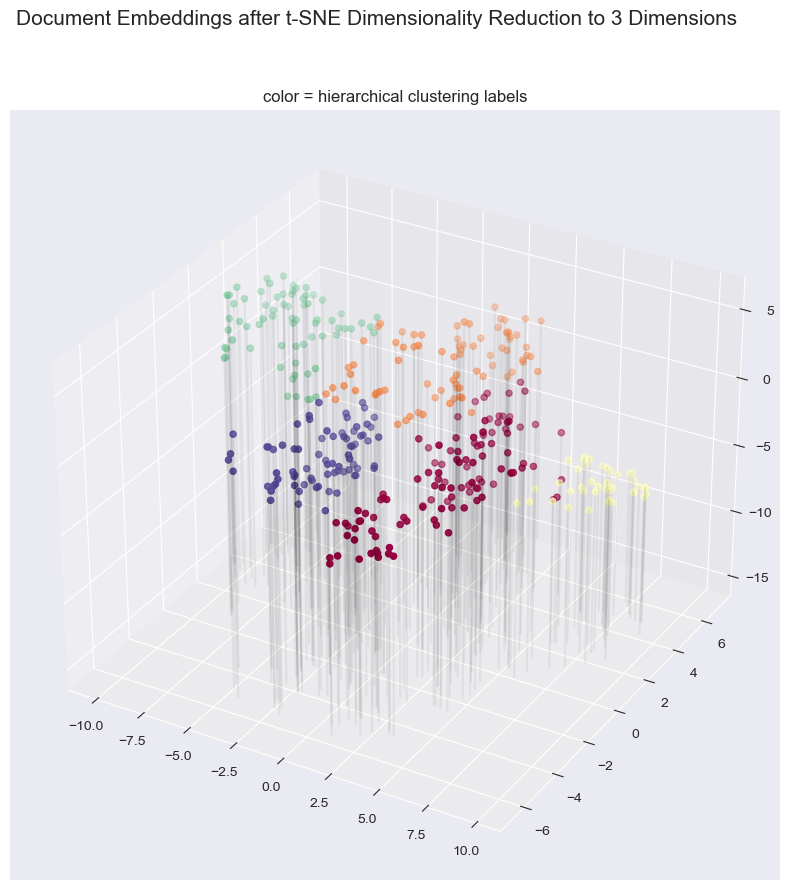

In [576]:
# plotting the original clusters in 3 dimensions using the t-SNE vectors, excluding the massive outlier
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = '3d')
# adding the data points to the 3d plot
ax.scatter(df_tsne3_vectors['x'],
           df_tsne3_vectors['y'],
           df_tsne3_vectors['z'],
           c = df_tsne3_vectors['hc_labels'], # coloring the points by hierarchical cluster labels
           cmap = 'Spectral'
           )
# drawing stem lines to the z plane from each data point
for i in range(len(df_tsne3_vectors)):
    x = df_tsne3_vectors['x'][i]
    y = df_tsne3_vectors['y'][i]
    z = df_tsne3_vectors['z'][i]
    ax.plot([x, x], [y, y], [z, -15], color = 'black', alpha = .05) # increasing the transparency with alpha

# adding a title to the plot
plt.suptitle('Document Embeddings after t-SNE Dimensionality Reduction to 3 Dimensions', fontsize = 15)
plt.title('color = hierarchical clustering labels', fontsize = 12)


Text(0.5, 0.92, 'color = k-means clustering labels')

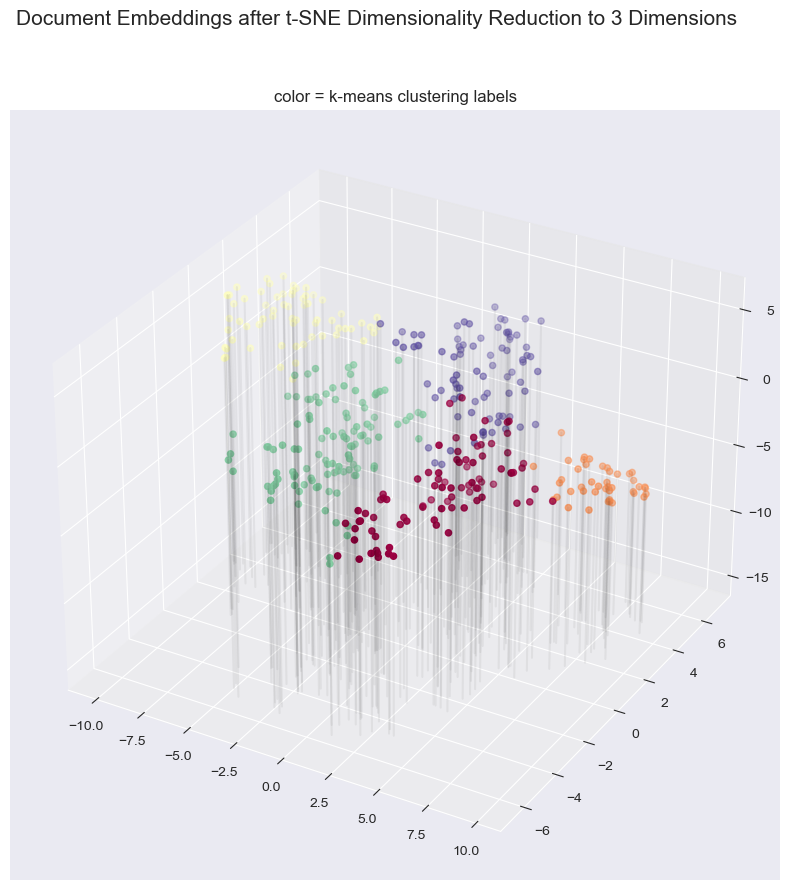

In [589]:
# repeating the above process--this time with colors corresponding to K-Means cluster labels
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_tsne3_vectors['x'],
           df_tsne3_vectors['y'],
           df_tsne3_vectors['z'],
           c = df_tsne3_vectors['kmeans_labels'],
           cmap = 'Spectral'
           )

for i in range(len(df_tsne3_vectors)):
    x = df_tsne3_vectors['x'][i]
    y = df_tsne3_vectors['y'][i]
    z = df_tsne3_vectors['z'][i]
    ax.plot([x, x], [y, y], [z, -15], color = 'black', alpha = 0.05)

# adding a title to the plot
plt.suptitle('Document Embeddings after t-SNE Dimensionality Reduction to 3 Dimensions', fontsize = 15)
plt.title('color = k-means clustering labels', fontsize = 12)

Text(0.5, 1.0, 'color = initial hierarchical clustering labels')

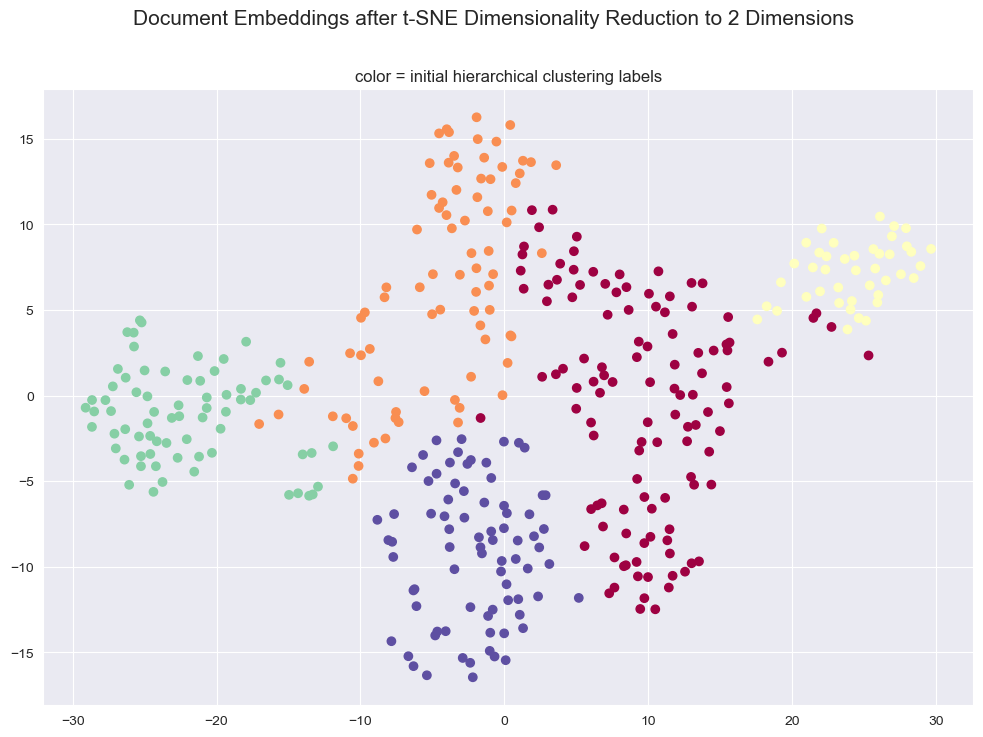

In [529]:
# plotting the hierarchical clusters in 2 dimensions using the t-SNE vectors
plt.figure(figsize = (12, 8))
plt.scatter(df_tsne2_vectors['x'],
            df_tsne2_vectors['y'],
            c = df_tsne2_vectors['hc_labels'],
            cmap = 'Spectral'
            )

# adding a title to the plot
plt.suptitle('Document Embeddings after t-SNE Dimensionality Reduction to 2 Dimensions', fontsize = 15)
plt.title('color = initial hierarchical clustering labels', fontsize = 12)

Text(0.5, 1.0, 'color = k-means clustering labels')

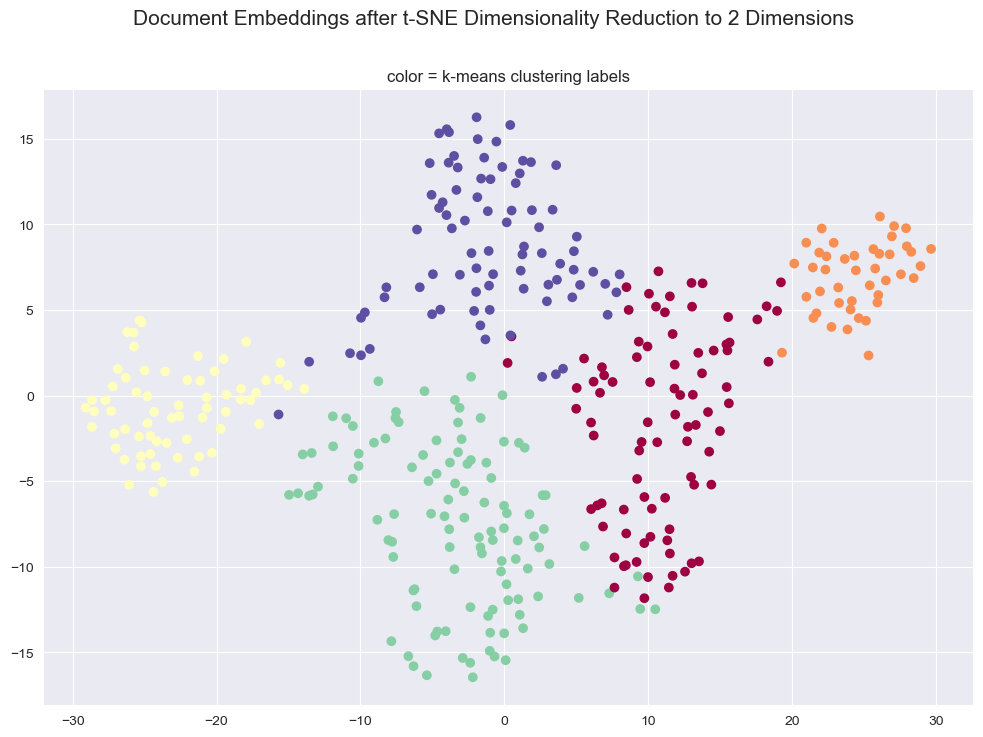

In [532]:
# plotting the K-Means clusters in 2 dimensions using the t-SNE vectors
plt.figure(figsize = (12, 8))
plt.scatter(df_tsne2_vectors['x'],
            df_tsne2_vectors['y'],
            c = df_tsne2_vectors['kmeans_labels'],
            cmap = 'Spectral'
            )

# adding a title to the plot
plt.suptitle('Document Embeddings after t-SNE Dimensionality Reduction to 2 Dimensions', fontsize = 15)
plt.title('color = k-means clustering labels', fontsize = 12)